In [67]:
import random
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import cluster
from sklearn.decomposition import PCA
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [68]:
paths, name, direction, expression, sunglasses = [], [], [], [], []
for f in os.listdir('faces/'):
    for i in os.listdir('faces/' + f + '/' ):
        # 划分后每个元素放入对应的列表中，每个元素仅放入一次
        if i.split('_')[0] not in name:
            name.append(i.split('_')[0])
        if i.split('_')[1] not in direction:
            direction.append(i.split('_')[1])
        if i.split('_')[2] not in expression:
            expression.append(i.split('_')[2])
        if i.split('_')[3] not in sunglasses:
            sunglasses.append(i.split('_')[3])
        paths.append('faces/' + f+ '/'  + i)

print('name:', name)
print('direction:', direction)
print('expression:', expression)
print('sunglasses:', sunglasses)

name: ['an2i', 'at33', 'boland', 'bpm', 'ch4f', 'cheyer', 'choon', 'danieln', 'glickman', 'karyadi', 'kawamura', 'kk49', 'megak', 'mitchell', 'night', 'phoebe', 'saavik', 'steffi', 'sz24', 'tammo']
direction: ['left', 'right', 'straight', 'up']
expression: ['angry', 'happy', 'neutral', 'sad']
sunglasses: ['open', 'sunglasses']


In [69]:
#打乱顺序
random.shuffle(paths)

In [70]:
def data(path):
    img, name_, direction_, expression_, sunglasses_ = [], [], [], [], []
    for f in path:
        img.append(np.array(list(Image.open(f).convert('L').getdata())))
        str_ = f.split('_')
        #特征量化
        num = 0
        for i in range(len(name)):
            if name[i] == str_[0].split('/')[2]:
                num = i
        name_.append(num)
        for i in range(len(direction)):
            if direction[i] == str_[1]:
                num = i
        direction_.append(num)
        for i in range(len(expression)):
            if expression[i] == str_[2]:
                num = i
        expression_.append(num)
        for i in range(len(sunglasses)):
            if sunglasses[i] == str_[3]:
                num = i
        sunglasses_.append(num)

    img = np.array(img)
    name_ = np.array(name_)
    direction_ = np.array(direction_)
    expression_ = np.array(expression_)
    sunglasses_ = np.array(sunglasses_)
    return {'image': img, 'name': name_, 'direction': direction_, 'expression': expression_, 'sunglasses': sunglasses_}



In [71]:
#训练集与测试集大小比例为3：1
train_size= int(len(paths) * 0.75)
path_1 = paths[:train_size]
path_2 = paths[train_size:]
Data = data(paths)
train_data = data(path_1)
test_data = data(path_2)
print(train_data)
print(train_data['image'].shape)
print(test_data['image'].shape)

{'image': array([[37, 36, 35, ..., 80, 21,  0],
       [ 3,  7, 39, ..., 60, 31,  0],
       [41, 40, 37, ...,  6, 11, 45],
       ...,
       [28, 26, 24, ...,  8, 28, 30],
       [25, 23, 22, ..., 78, 27, 27],
       [32, 30, 29, ...,  9, 31, 34]]), 'name': array([14, 13, 17,  6,  2,  6,  7, 18, 10, 15, 18,  6, 18, 19, 14, 11, 13,
       17, 14, 11,  8,  3, 14, 15, 18, 12,  3, 15,  3,  5, 13, 17, 16,  6,
       17, 18, 18,  9, 17, 14,  6,  7, 11,  9,  6,  7, 13,  0, 11, 10, 18,
        9,  7, 16,  4,  0, 18,  4, 17,  8, 10,  7,  0, 15, 14, 19,  0,  8,
       11, 15,  5,  8, 19, 12,  2,  4, 14,  0,  3,  0,  5, 15, 16, 10, 18,
        6,  9,  1, 15, 18,  7,  9, 12,  7, 11, 11,  9, 12, 12,  1,  5,  6,
        9, 13,  0,  3, 13,  5, 10, 12,  3, 16,  3,  6,  4, 15, 16, 11,  7,
       12,  7,  1, 17, 17,  9,  2,  8,  1,  5, 17,  1, 15,  9, 19, 18, 14,
        0, 10,  2, 13, 11,  0, 17, 18, 19,  9, 16, 16,  6, 10,  0,  2,  3,
        5, 17,  5,  7,  6,  4,  6, 19,  6, 13, 18,  4, 13, 10,  6

In [72]:
#SVM
params = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
          'C': [1e-2, 0.1, 1, 10, 1e2],
          'gamma': ['auto', 0.08, 0.2, 0.4, 0.6, 0.8]}
svm = GridSearchCV(SVC(decision_function_shape='ovr'), params)
svm = svm.fit(train_data['image'], train_data['name'])
print(svm.best_params_)
y_pred = svm.predict(test_data['image'])
print(classification_report(test_data['name'], y_pred, target_names=name))
#五折交叉验证
scores = cross_val_score(svm, Data['image'], Data['name'], cv=5, scoring='accuracy')
print('五折交叉验证结果', scores)

{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
              precision    recall  f1-score   support

        an2i       1.00      1.00      1.00         6
        at33       1.00      1.00      1.00        10
      boland       1.00      1.00      1.00         8
         bpm       1.00      1.00      1.00         9
        ch4f       1.00      1.00      1.00        12
      cheyer       1.00      1.00      1.00        12
       choon       1.00      1.00      1.00         6
     danieln       1.00      0.80      0.89         5
    glickman       1.00      1.00      1.00         6
     karyadi       1.00      1.00      1.00         5
    kawamura       1.00      1.00      1.00         7
        kk49       1.00      1.00      1.00         7
       megak       1.00      1.00      1.00         8
    mitchell       1.00      1.00      1.00         7
       night       1.00      1.00      1.00         7
      phoebe       1.00      1.00      1.00         7
      saavik       0.89      1.0

In [73]:
#neural networks
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        30,
        activation = "softmax",
        kernel_regularizer = tf.keras.regularizers.l2()
    )
])
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'] 
)
history = model.fit( 
    train_data['image'], train_data['name'], 
    batch_size = 64,
    epochs = 400,
    validation_split = 0.2
)
y_pred_hot = model.predict(test_data['image'])
y_pred=[]
#one-hot编码转为对应类别
for i in y_pred_hot:
    y_pred.append(np.argmax(i))
print(classification_report(test_data['name'], y_pred, target_names=name))

Epoch 1/400
6/6 [==============================] - 1s 41ms/step - loss: 2494.8757 - accuracy: 0.0882 - val_loss: 3927.1055 - val_accuracy: 0.1809
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 5164.4258 - accuracy: 0.2193 - val_loss: 3824.3982 - val_accuracy: 0.2340
Epoch 3/400
6/6 [==============================] - 0s 12ms/step - loss: 3219.0427 - accuracy: 0.2727 - val_loss: 2074.0029 - val_accuracy: 0.3298
Epoch 4/400
6/6 [==============================] - 0s 12ms/step - loss: 1057.8073 - accuracy: 0.4947 - val_loss: 740.8332 - val_accuracy: 0.6383
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 898.3220 - accuracy: 0.6524 - val_loss: 338.0873 - val_accuracy: 0.7553
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 113.1574 - accuracy: 0.8529 - val_loss: 18.0260 - val_accuracy: 0.9894
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 13.2486 - accuracy: 0.9866 - val_loss: 17.1473 - val_accuracy:

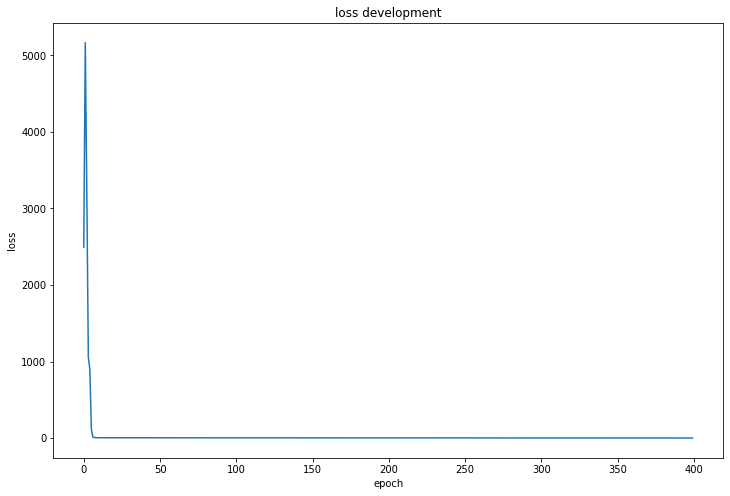

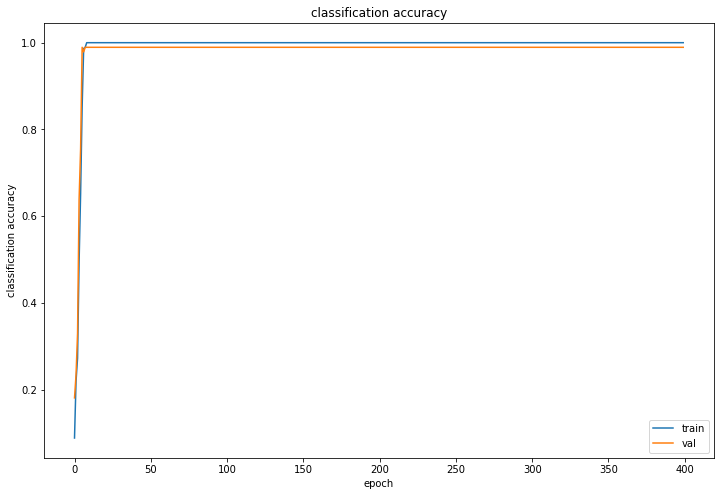

In [74]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(history.history['loss'])
plt.title('loss development')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('classification accuracy')
plt.xlabel('epoch')
plt.ylabel('classification accuracy')
plt.legend()
plt.show()

In [75]:
#SVM
params = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
          'C': [1e-2, 0.1, 1, 10, 1e2],
          'gamma': ['auto', 0.08, 0.2, 0.4, 0.6, 0.8]}
svm = GridSearchCV(SVC(decision_function_shape='ovr'), params)
svm = svm.fit(train_data['image'], train_data['expression'])
print(svm.best_params_)
y_pred = svm.predict(test_data['image'])
print(classification_report(test_data['expression'], y_pred, target_names=expression))

{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        41
       happy       0.17      1.00      0.30        27
     neutral       0.00      0.00      0.00        48
         sad       0.00      0.00      0.00        40

    accuracy                           0.17       156
   macro avg       0.04      0.25      0.07       156
weighted avg       0.03      0.17      0.05       156



Epoch 1/400
6/6 [==============================] - 0s 30ms/step - loss: 4657.8760 - accuracy: 0.2032 - val_loss: 7809.6709 - val_accuracy: 0.2553
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 8036.1499 - accuracy: 0.2193 - val_loss: 8111.5161 - val_accuracy: 0.2872
Epoch 3/400
6/6 [==============================] - 0s 14ms/step - loss: 7466.0635 - accuracy: 0.2380 - val_loss: 5590.5942 - val_accuracy: 0.1702
Epoch 4/400
6/6 [==============================] - 0s 12ms/step - loss: 5697.7554 - accuracy: 0.2353 - val_loss: 8660.2783 - val_accuracy: 0.2872
Epoch 5/400
6/6 [==============================] - 0s 11ms/step - loss: 6522.1382 - accuracy: 0.2647 - val_loss: 4210.4302 - val_accuracy: 0.2447
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 5870.7407 - accuracy: 0.2594 - val_loss: 6557.6235 - val_accuracy: 0.2872
Epoch 7/400
6/6 [==============================] - 0s 8ms/step - loss: 7376.6479 - accuracy: 0.2433 - val_loss: 9894.6289 - va

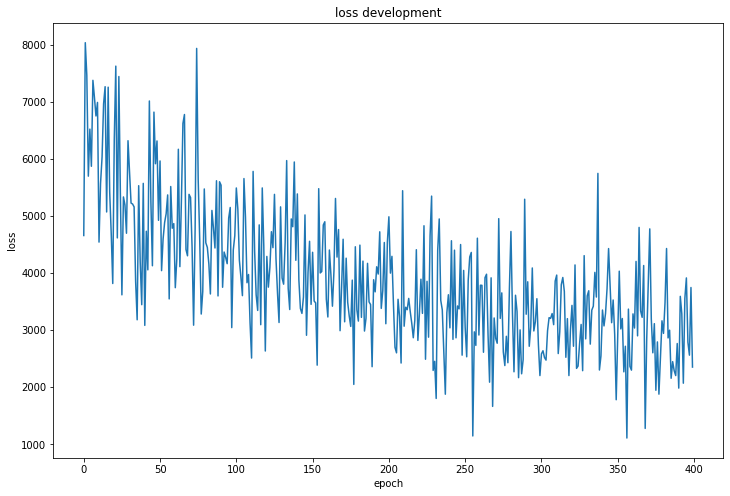

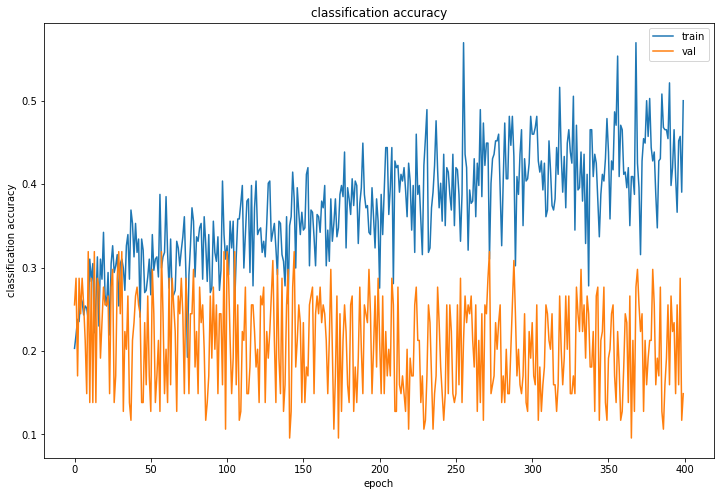

In [76]:
#neural networks
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        30,
        activation = "softmax",
        kernel_regularizer = tf.keras.regularizers.l2()
    )
])
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'] 
)
history = model.fit( 
    train_data['image'], train_data['expression'], 
    batch_size = 64,
    epochs = 400,
    validation_split = 0.2
)
y_pred_hot = model.predict(test_data['image'])
y_pred=[]
#one-hot编码转为对应类别
for i in y_pred_hot:
    y_pred.append(np.argmax(i))
print(classification_report(test_data['expression'], y_pred, target_names=expression))
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(history.history['loss'])
plt.title('loss development')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('classification accuracy')
plt.xlabel('epoch')
plt.ylabel('classification accuracy')
plt.legend()
plt.show()

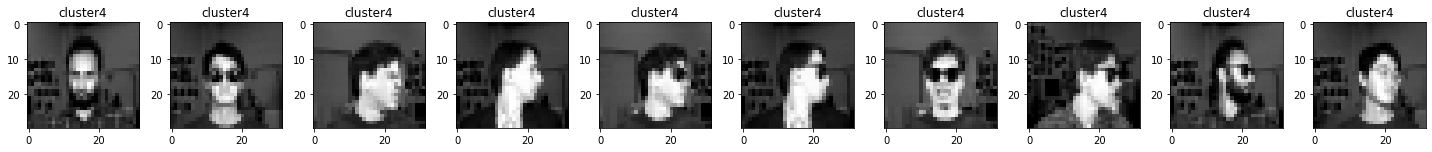

In [77]:
clf = cluster.KMeans(
    init='k-means++',
     n_clusters=4, 
     random_state=1, 
     max_iter = 2000
)
clf.fit(train_data['image'])
y_pred = clf.predict(test_data['image'])

cluster_1, cluster_2, cluster_3, cluster_4 = [], [], [], []
for i in range(len(paths) - train_size):
    if(y_pred[i]==0):
        cluster_1.append(i)
    elif(y_pred[i]==1):
        cluster_2.append(i)
    elif(y_pred[i]==2):
        cluster_3.append(i)
    else:
        cluster_4.append(i)
#输出10个样本
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][cluster_1[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('cluster1')
plt.tight_layout()
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][cluster_2[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('cluster2')
plt.tight_layout()
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][cluster_3[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('cluster3')
plt.tight_layout()
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][cluster_4[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('cluster4')
plt.tight_layout()

In [78]:
print(classification_report(test_data['expression'], y_pred, target_names=expression))

              precision    recall  f1-score   support

       angry       0.21      0.10      0.13        41
       happy       0.17      0.22      0.19        27
     neutral       0.31      0.50      0.38        48
         sad       0.46      0.28      0.34        40

    accuracy                           0.29       156
   macro avg       0.29      0.27      0.26       156
weighted avg       0.30      0.29      0.27       156



              precision    recall  f1-score   support

       angry       0.21      0.10      0.13        41
       happy       0.17      0.22      0.19        27
     neutral       0.31      0.50      0.38        48
         sad       0.46      0.28      0.34        40

    accuracy                           0.29       156
   macro avg       0.29      0.27      0.26       156
weighted avg       0.30      0.29      0.27       156



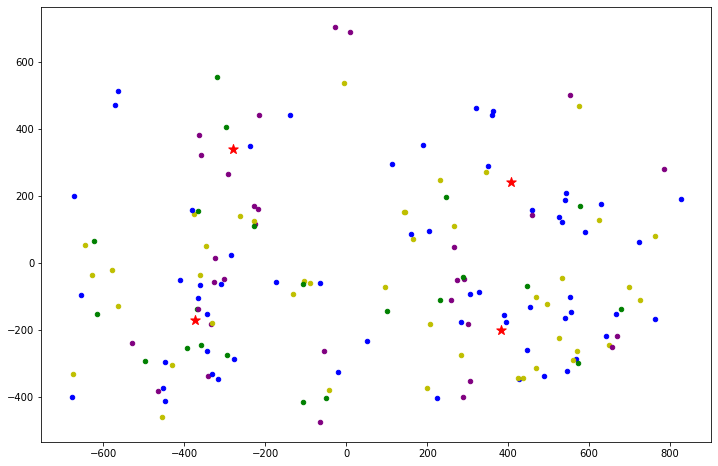

In [79]:
#PCA降维
pca = PCA(n_components = 2)
pca.fit(train_data['image'])
train_data_pca = pca.transform(train_data['image'])
test_data_pca = pca.transform(test_data['image'])
clf_pca = cluster.KMeans(
    init='k-means++',
     n_clusters=4, 
     random_state=1, 
     max_iter = 2000
)
clf_pca.fit(train_data_pca)
y_pred = clf.predict(test_data['image'])
print(classification_report(test_data['expression'], y_pred, target_names=expression))
plt.figure(figsize=(12,8))
points = []
colors = ['purple', 'b', 'y', 'g']
i = 0
while i < len(paths) - train_size:
    point = [test_data_pca[i][0],test_data_pca[i][1]]
    points.append(point)
    i += 1
kmeans = cluster.KMeans(n_clusters=4).fit(all_points)
for id_, label in enumerate(kmeans.labels_):
    plt.scatter(points[id_][0], points[id_][1], color = colors[label], marker='o', s=20)
for c in range(0,4):
    plt.scatter(kmeans.cluster_centers_ [c][0], kmeans.cluster_centers_ [c][1], color = 'red', marker='*', s=100)

{'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
              precision    recall  f1-score   support

        left       1.00      1.00      1.00        40
       right       1.00      1.00      1.00        34
    straight       1.00      0.97      0.99        40
          up       0.98      1.00      0.99        42

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



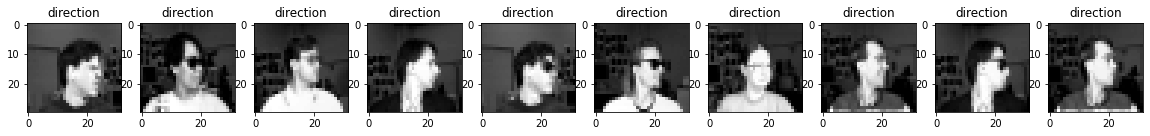

In [82]:
#SVM
params = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
          'C': [1e-2, 0.1, 1, 10, 1e2],
          'gamma': ['auto', 0.08, 0.2, 0.4, 0.6, 0.8]}
svm = GridSearchCV(SVC(decision_function_shape='ovr'), params)
svm = svm.fit(train_data['image'], train_data['direction'])
print(svm.best_params_)
y_pred = svm.predict(test_data['image'])
print(classification_report(test_data['direction'], y_pred, target_names=direction))

c1, c2, c3, c4 = [], [], [], []
for i in range(len(paths) - train_size):
    if(y_pred[i]==0):
        c1.append(i)
    elif(y_pred[i]==1):
        c2.append(i)
    elif(y_pred[i]==2):
        c3.append(i)
    else:
        c4.append(i)
#输出10个样本
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][c1[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('direction')

{'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
              precision    recall  f1-score   support

        open       0.96      0.94      0.95        78
  sunglasses       0.94      0.96      0.95        78

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156



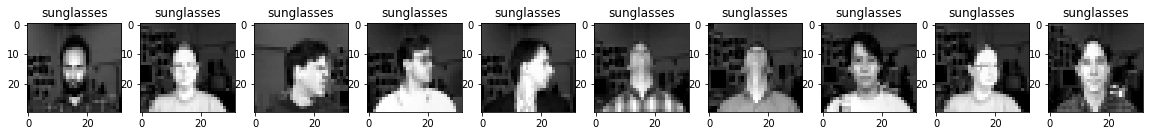

In [83]:
#SVM
params = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
          'C': [1e-2, 0.1, 1, 10, 1e2],
          'gamma': ['auto', 0.08, 0.2, 0.4, 0.6, 0.8]}
svm = GridSearchCV(SVC(decision_function_shape='ovr'), params)
svm = svm.fit(train_data['image'], train_data['sunglasses'])
print(svm.best_params_)
y_pred = svm.predict(test_data['image'])
print(classification_report(test_data['sunglasses'], y_pred, target_names=sunglasses))
c1, c2 = [], []
for i in range(len(paths) - train_size):
    if(y_pred[i]==0):
        c1.append(i)
    else:
        c2.append(i)
#输出10个样本
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    grid_data = test_data['image'][c1[i]].reshape(30,32)
    plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
    plt.title('sunglasses')